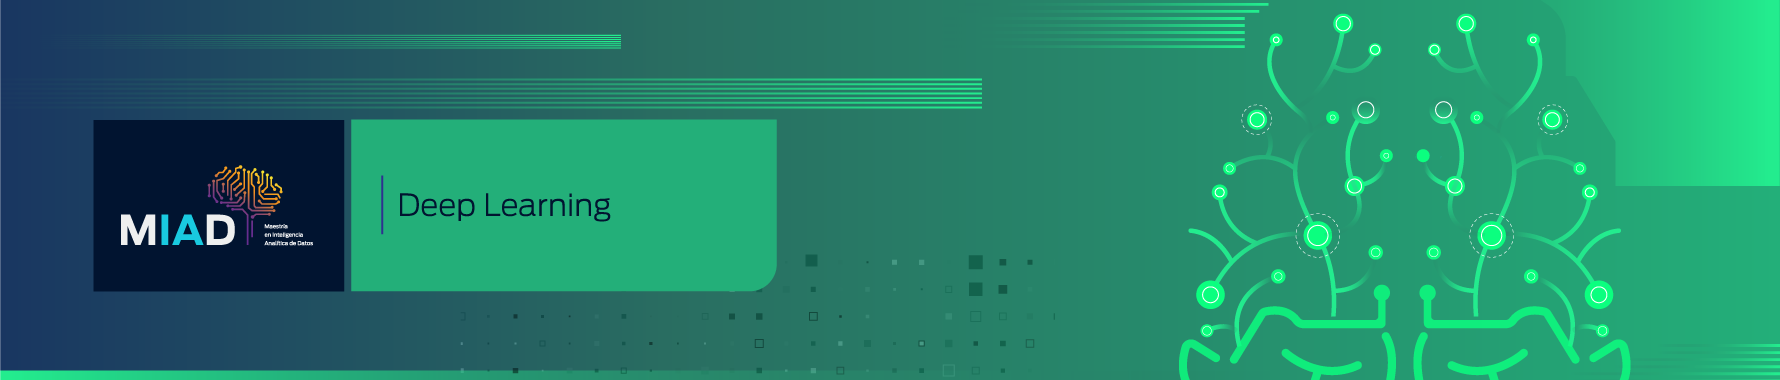

# Introducción al Deep Learning 
## Conceptos básicos de Deep Learning: Descenso de gradiente

### Propósito 
El método de descenso de gradiente (o gradiente descendiente) es un algoritmo de optimización iterativo para encontrar el mínimo o máximo de una función objetivo $f(x)$ en términos de la variable $x$. En el contexto de Deep Learning, este método resulta de gran importancia y utilidad para minimizar el error de predicción optimizando la función de costo (*loss function*) de un modelo determinado. En este notebook se pretende ilustrar el uso del algoritmo y mostrar cómo puede ser implementado "manualmente" para hallar el óptimo de una función, tanto para casos univariados como multivariados. Finalmente, se propone una actividad de calificación automática para analizar diferentes criterios de parada que se pueden establecer para el algoritmo.

### Instrucciones generales

1. Cuando se le solicite declarar una estructura de datos debe usar el nombre exigido.


2. Utilice estrictamente los tipos de datos y nombres de variable indicadas en los enunciados de los ejercicios.


3. Evite crear, eliminar o modificar celdas de este notebook (salvo lo que se le indique) pues puede afectar el proceso de calificación automático.  


### Librerías a importar

A continuación se muestran los comandos a ejecutar para poder implementar los procedimientos de este notebook:


In [1]:
import numpy as np
from numpy.random import rand
from matplotlib import pyplot as plt

### Pasos para implementar manualmente el algoritmo de descenso de gradiente

1. Definir la función objetivo.
2. Definir el gradiente de la función.
3. Definir parámetros inciales: Definir un punto o solución inicial, una tasa de aprendizaje y un criterio de parada.
4. Graficar el algoritmo de descenso gradiente.


### 1. Definición de función objetivo

Para iniciar el proceso de optimización, debemos definir la función que queremos minimizar o maximizar, es decir, la función objetivo, que también podría denominarse función de costo, función de pérdida o función de error, según sea el caso. Para este laboratorio buscaremos minimizar una función simple: *$x^2$*. 

In [2]:
# Definir función objetivo convexa
def fobj(x):
    return x**2.0

Notemos que, como la función es convexa, entonces el algoritmo de gradiente descendiente buscará el mínimo.

### 2. Cálculo del gradiente

La idea en el algoritmo de descenso de gradiente es que en cada iteración se dé un paso en la dirección opuesta al gradiente de la función objetivo evaluada en el punto dado, puesto que es la dirección en la que $f(x)$ decrece más rápido. Así, procedemos a definir el gradiente de la función ($\nabla f$) para usarlo en nuestra implementación del algoritmo:

In [3]:
# Definir gradiente de la función objetivo
def gradiente(x):
    return 2.0*x

### Función descenso de gradiente

Luego de definir nuestra función objetivo y su gradiente, debemos definir un punto o solución inicial, una tasa de aprendizaje $\alpha$ (también llamada _step_ o tamaño del paso), y un criterio de parada para nuestro algoritmo iterativo. Estos elementos constituyen los parámetros de nuestra función de descenso de gradiente, en la que partimos de la solución inicial y actualizamos la solución en cada iteración de la siguiente manera:

$$ X^{new} =  X^{old} - \alpha*{\nabla f(X^{old})}$$

Lo anterior, se realiza hasta cumplir con el criterio de parada del algoritmo. En la función que se presenta a continuación, se seleccionó como criterio de parada que la norma del gradiente sea menor al nivel de tolerancia $(||\nabla f(X)||<\epsilon)$.

In [4]:
# Función de descenso de gradiente
def descenso_gradiente(fun_obj, gradiente, sol_inicial, step, tolerancia):
    # Monitoreo de solución y función objetivo evaluada
    soluciones, feval, gradeval = list(), list(), list()
    # Cargar solución inicial
    solucion = sol_inicial
    # Definir variable booleana para validar si se cumplió el criterio de parada
    stop = False
    # Definir contador de iteraciones
    num_iter = 1
    while stop==False:
        # Evaluar gradiente
        gradiente_eval = gradiente(solucion)
        # Actualizar la solución
        solucion = solucion - step * gradiente_eval
        # Evaluar la solución
        solucion_eval = fun_obj(solucion)
        # Almacenar solución e imprimir resultados de la iteración
        soluciones.append(solucion)
        feval.append(solucion_eval)
        gradeval.append(gradiente_eval)
        print("Iteración "+str(num_iter)," - Solución: "+str(solucion)+". Gradiente: "+str(gradiente_eval)+". Función objetivo: "+str(format(solucion_eval,'.4f')))
        # Actualizar contador de iteraciones
        num_iter += 1
        # Validar si se cumplió el criterio de parada, es decir, si la norma del gradiente evaluado en la solución actual es menor a la tolerancia dada
        if (np.linalg.norm(gradiente_eval) < tolerancia):
            stop = True
    return [soluciones, feval, gradeval]

### 3. Definición de parámetros inciciales

Procedemos a probar la función anterior para encontrar el mínimo de $x^2$ mediante nuestro algoritmo de descenso de gradiente. Los conceptos de función objetivo y el gradiente ya fueron definidos previamente, por lo que solo resta definir la solución inicial, el tamaño del paso y la tolerancia. Para este caso, aunque estos tres parámetros se definieron de forma aleatoria, terminan influyendo sobre la velocidad de convergencia, tiempo de ejecución y exactitud del algoritmo, por lo que deben ser ajustados en caso de que el algoritmo no converja a la solución.

In [5]:
# Definir tolerancia (Entre más baja sea, mejor será la solución, pero mayor el tiempo computacional)
tolerancia = 0.001
# Definir tamaño del paso (Si es muy pequeño, el algoritmo tomará mucho tiempo en encontrar el óptimo, pero tampoco
# puede definirse muy grande, pues se corre el riesgo de que dichos cambios grandes no permitan la convergencia del
# algoritmo)
step = 0.1
# Definir solución inicial (Entre más cercana sea al óptimo, más rápido se alcanzará convergencia. Si se trata de una
# función con varios mínimos locales, la solución encontrada dependerá de esta solución inicial y del tamaño del
# paso, pues el algoritmo no distingue entre mínimos locales y globales. Sin embargo, con múltiples dimensiones esto
# no suele ser una mayor preocupación, pues el gradiente disminuye a cero solo en algunas dimensiones en dichos 
# mínimos locales)
sol_inicial = 6

Usamos la función `descenso_gradiente`, obteniendo las soluciones y el valor de la función objetivo en cada iteración:

In [6]:
# Llamar la función descenso de gradiente
soluciones, feval, gradeval = descenso_gradiente(fobj, gradiente, sol_inicial, step, tolerancia)

Iteración 1  - Solución: 4.8. Gradiente: 12.0. Función objetivo: 23.0400
Iteración 2  - Solución: 3.84. Gradiente: 9.6. Función objetivo: 14.7456
Iteración 3  - Solución: 3.072. Gradiente: 7.68. Función objetivo: 9.4372
Iteración 4  - Solución: 2.4576000000000002. Gradiente: 6.144. Función objetivo: 6.0398
Iteración 5  - Solución: 1.9660800000000003. Gradiente: 4.9152000000000005. Función objetivo: 3.8655
Iteración 6  - Solución: 1.5728640000000003. Gradiente: 3.9321600000000005. Función objetivo: 2.4739
Iteración 7  - Solución: 1.2582912000000002. Gradiente: 3.1457280000000005. Función objetivo: 1.5833
Iteración 8  - Solución: 1.0066329600000001. Gradiente: 2.5165824000000003. Función objetivo: 1.0133
Iteración 9  - Solución: 0.8053063680000001. Gradiente: 2.0132659200000003. Función objetivo: 0.6485
Iteración 10  - Solución: 0.6442450944000001. Gradiente: 1.6106127360000002. Función objetivo: 0.4151
Iteración 11  - Solución: 0.5153960755200001. Gradiente: 1.2884901888000002. Función 

Mediante el algoritmo de descenso de gradiente con el criterio de parada definido, hemos encontrado luego de 44 iteraciones que el mínimo de $x^2$ se obtiene cuando $x=0.0003267$, es decir, cuando la función tiene un valor de $x^2=1.0671399e-07$. En caso de definir una tolerancia aun más baja, habríamos obtenido un valor más cercano a 0, que en este caso es el mínimo real de esta función.

In [7]:
# Imprimir solución y el valor de la función objetivo en dicha solución
print(soluciones[-1]) 
print(feval[-1])

0.0003266710722441011
1.0671398944111072e-07


### 4. Graficar algoritmo de descenso de gradiente
Así como se presentó la solución en cada iteración al correr la función, podríamos también observarlo de manera gráfica generando un plot del valor de la función objetivo en cada iteración, en el cual observamos cómo va disminuyendo.

Text(0, 0.5, 'Función objetivo')

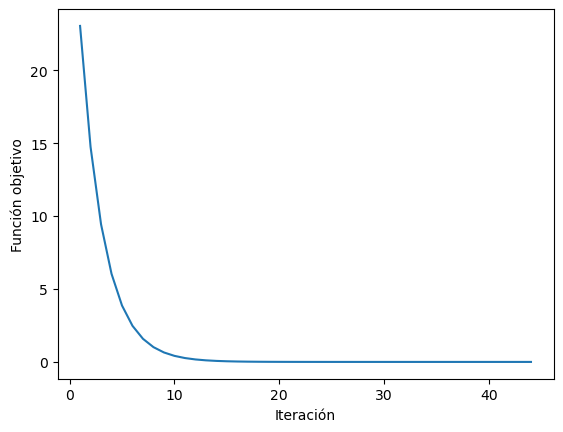

In [8]:
# Graficar función objetivo en cada iteración
plt.plot(np.arange(len(feval))+1,feval)
plt.xlabel("Iteración")
plt.ylabel("Función objetivo")

Alternativamente, aprovechando que solo tenemos una variable, podemos graficar directamente nuestra función y, con puntos de color rojo, las soluciones halladas en cada una de las iteraciones hasta encontrar el mínimo, tal como se presenta a continuación. 

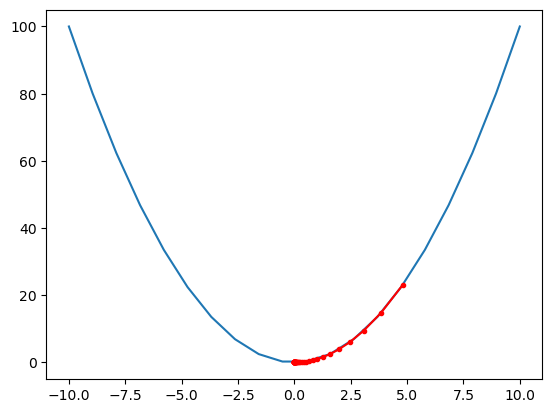

In [9]:
# Graficar la función objetivo
f = fobj(np.linspace(-10,10,num=20))
plt.plot(np.linspace(-10,10,num=20),f)

# Graficar soluciones encontradas
plt.plot(soluciones, feval, '.-', color='red')
plt.show()

### Ejemplo multivariado

La función implementada para el algortimo de descenso de gradiente también se puede aplicar para encontrar el óptimo de una función con múltiples variables. La lógica sigue siendo la misma y lo único que cambia es que $X$ y $\nabla f(X)$ ahora serían vectores:

$$ X = \left[x_1, x_2, ..., x_p\right]$$

$$ {\nabla f(X)} = \left[\frac{\partial f(X)}{\partial x_1}, \frac{\partial f(X)}{\partial x_2}, ..., \frac{\partial f(X)}{\partial x_p}\right]$$

El criterio de parada pasa a ser entonces que la norma del gradiente sea menor a la tolerancia, lo cual está implementado en la función anterior al usar _np.linalg.norm( )_. En el caso univariado se calculaba el valor absoluto del gradiente, mientras que al aumentar la dimensionalidad se tiene que calcular la norma del vector $p$-dimensional. 

Procedamos entonces a solucionar el siguiente problema de optimización en $\mathbb{R}^3$:

$$ \min f(X) = 4x_{1}^2+\frac{27}{2}x_{2}^2 + \frac{3}{2}x_{3}^2 $$

In [10]:
# Definir función objetivo - X sería un np.array
def fobj(X):
    return 4*X[0]**2 + (27/2)*X[1]**2 + (3/2)*X[2]**2
# Definir gradiente de la función objetivo - sería una np.array con 3 elementos (la derivada parcial con respecto a cada x)
def gradiente(X):
    return np.array((8*X[0], 27*X[1], 3*X[2]))
# Definir tolerancia
tolerancia = 0.001
# Definir tamaño del paso
step = 0.05
# Definir solución inicial
sol_inicial = np.array((-50, 0.1, 20))
# Llamar la función descenso de gradiente
soluciones, feval, gradeval = descenso_gradiente(fobj, gradiente, sol_inicial, step, tolerancia)

Iteración 1  - Solución: [-30.     -0.035  17.   ]. Gradiente: [-400.     2.7   60. ]. Función objetivo: 4033.5165
Iteración 2  - Solución: [-1.800e+01  1.225e-02  1.445e+01]. Gradiente: [-240.      -0.945   51.   ]. Función objetivo: 1609.2058
Iteración 3  - Solución: [-1.08000e+01 -4.28750e-03  1.22825e+01]. Gradiente: [-144.         0.33075   43.35   ]. Función objetivo: 692.8500
Iteración 4  - Solución: [-6.4800000e+00  1.5006250e-03  1.0440125e+01]. Gradiente: [-86.4        -0.1157625  36.8475   ]. Función objetivo: 331.4559
Iteración 5  - Solución: [-3.88800000e+00 -5.25218750e-04  8.87410625e+00]. Gradiente: [-5.1840000e+01  4.0516875e-02  3.1320375e+01]. Función objetivo: 178.5908
Iteración 6  - Solución: [-2.33280000e+00  1.83826563e-04  7.54299031e+00]. Gradiente: [-3.11040000e+01 -1.41809063e-02  2.66223187e+01]. Función objetivo: 107.1129
Iteración 7  - Solución: [-1.39968000e+00 -6.43392969e-05  6.41154177e+00]. Gradiente: [-1.86624000e+01  4.96331719e-03  2.26289709e+01].

Text(0, 0.5, 'Función objetivo')

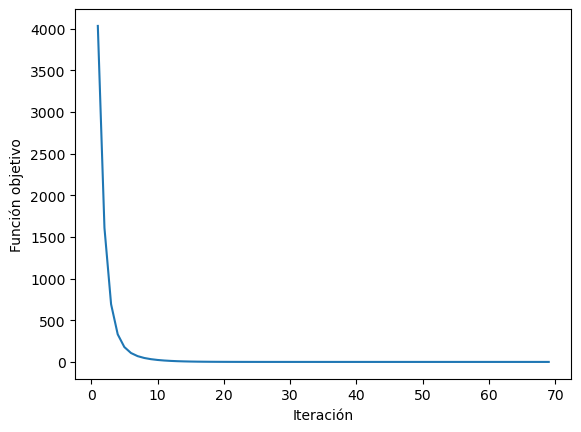

In [11]:
# Graficar función objetivo en cada iteración
plt.plot(np.arange(len(feval))+1,feval)
plt.xlabel("Iteración")
plt.ylabel("Función objetivo")

## Actividad formativa individual: Criterios de parada del algoritmo de descenso de gradiente

En lugar de evaluar la norma del gradiente en la solución dada y validar si es lo suficientemente cercana a cero, se pueden establecer otros criterios de parada para el algoritmo, como:

* $|f(X_k)-f(X_{k-1})|<\epsilon$. El valor absoluto del cambio en la función objetivo es menor a cierta tolerancia.
* $||X_k-X_{k-1}||<\epsilon$. La norma del cambio en las soluciones es menor a cierta tolerancia.
* Alcanzar un número máximo de iteraciones.

En esta actividad autocalificada por _nbgrader_ , deberá crear una función que implemente el algoritmo de descenso de gradiente hasta cumplir con el criterio de parada seleccionado. Específicamente, debe ajustar la función `descenso_gradiente` en la celda posterior, sustituyendo el parámetro "tolerancia" por dos parámetros: **"stop_criteria"** y **"stop_value"**.

"stop_criteria" debe ser un entero entre 1 y 4:
* Si es 1, el criterio de parada seleccionado es el de la norma del gradiente.
* Si es 2, el criterio de parada seleccionado es el cambio en la función objetivo entre iteraciones.
* Si es 3, el criterio de parada seleccionado es el cambio en la solución entre iteraciones.
* Si es 4, el criterio de parada seleccionado corresponde a alcanzar un máximo de iteraciones.

"stop_value" debe ser:
* El valor de la tolerancia en caso de que "stop_criteria" sea 1, 2 o 3.
* Un entero indicando el número máximo de iteraciones en caso de que "stop_criteria" sea 4.

Tenga en cuenta que su función debe retornar 3 listas: la solución, el valor de la función objetivo y el gradiente en cada iteración; y será evaluada al utilizarla para resolver el siguiente problema de optimización en $\mathbb{R}^4$:

$$ \min f(x) = \frac{1}{2}x^{T}Qx - b^{T}x $$

donde tanto $x$ como $b$ se consideran vectores columna, y:

\begin{equation}
Q=
\begin{bmatrix}
10 & 1 & 0&3\\
1 & 6& -6&-3\\
0 & -6 & 12&6\\
3 & -3 & 6 &9
\end{bmatrix}
\end{equation}

\begin{equation}
b=
\begin{bmatrix}
-8\\
10\\
-10\\
6
\end{bmatrix}
\end{equation}

In [2]:
# Definir función objetivo - X sería un np.array
def fobj(X):
    Q = np.array([[10, 1, 0, 3], 
                   [1, 6, -6, -3],
                   [0, -6, 12, 6],
                   [3, -3, 6, 9]])
    b = np.array([-8,10,-10,6])
    return (1/2)*np.matmul(np.matmul(np.transpose(X),Q),X)-np.matmul(np.transpose(b),X)

# Definir función objetivo - X sería un np.array
def gradiente(X):
    Q = np.array([[10, 1, 0, 3], 
                   [1, 6, -6, -3],
                   [0, -6, 12, 6],
                   [3, -3, 6, 9]])
    b = np.array([-8,10,-10,6])
    return np.matmul(Q,X)-b

Recuerde que en ese caso, el gradiente de la función se puede calcular como:

$$  \nabla f(x) = Qx - b$$

Implemente su función en la siguiente celda de código:

In [11]:
# Algoritmo de descenso de gradiente seleccionando criterio de parada
def descenso_gradiente(fun_obj, gradiente, sol_inicial, step, stop_criteria, stop_value):
    
    # Monitoreo de solución y función objetivo evaluada
    soluciones, feval, gradeval = list(), list(), list()
    # Cargar solución inicial
    solucion = sol_inicial
    # Definir variable booleana para validar si se cumplió el criterio de parada
    stop = False
    # Definir contador de iteraciones
    num_iter = 1
    
    while stop==False:
        
        # Evaluar gradiente
        gradiente_eval = gradiente(solucion)
        # Actualizar la solución
        solucion = solucion - step * gradiente_eval
        # Evaluar la solución
        solucion_eval = fun_obj(solucion)
        # Almacenar solución e imprimir resultados de la iteración
        soluciones.append(solucion)
        feval.append(solucion_eval)
        gradeval.append(gradiente_eval)
    
        # Validar si se cumplió el criterio de parada, segun el stop_criteria seleccionado 
        match(stop_criteria):
            # Si es 1, el criterio de parada seleccionado es el de la norma del gradiente.
            case (1):
                stop = (np.linalg.norm(gradiente_eval) < stop_value)
                    
            #Si es 2, el criterio de parada seleccionado es el cambio en la función objetivo entre iteraciones.
            case (2):
                if (len(feval) > 1):
                    stop = (abs(feval[-1] - feval[-2]) < stop_value)

            #Si es 3, el criterio de parada seleccionado es el cambio en la solución entre iteraciones.
            case (3):
                if (num_iter > 2):
                    stop = (np.linalg.norm((soluciones[-1] - soluciones[-2])) < stop_value)

            #Si es 4, el criterio de parada seleccionado corresponde a alcanzar un máximo de iteraciones.
            case (4):
                stop =(num_iter == stop_value)
                    
        # Actualizar contador de iteraciones
        num_iter += 1
    
        
    return [soluciones, feval, gradeval]
    

Las siguientes pruebas (tests) le permitirán evaluar su código y validar si los resultados son los esperados. *NOTA: Este laboratorio posee pruebas ocultas con las cuales se realizan verificaciones adicionales a su código. Dichas pruebas afectarán su nota, por lo tanto debe asegurarse que el razonamiento de sus algoritmos sea el correcto.* 

In [12]:
# Tests
soluciones1, feval1, gradeval1 = descenso_gradiente(fobj, gradiente, np.array((0,3,6,0)), 0.1, 1, 0.001)
assert round(soluciones1[-1][0], 6) == round(-1.8571488930212339, 6)
soluciones2, feval2, gradeval2 = descenso_gradiente(fobj, gradiente, np.array((0,3,6,0)), 0.1, 2, 0.001)
assert len(soluciones2) == 1286 and (gradeval2[0][2]==64)
soluciones3, feval3, gradeval3 = descenso_gradiente(fobj, gradiente, np.array((0,3,6,0)), 0.1, 3, 0.001)
assert round(soluciones3[7][3], 6)==round(4.446437520000002, 6)
soluciones4, feval4, gradeval4 = descenso_gradiente(fobj, gradiente, np.array((0,3,6,0)), 0.1, 4, 5)
assert (len(feval4) == 5) and ( round(feval4[-1],6) == round(91.40953566665024, 6))
